<a href="https://colab.research.google.com/github/D-Soto/Coco/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 2/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df.iloc[:, [3, 4]].values

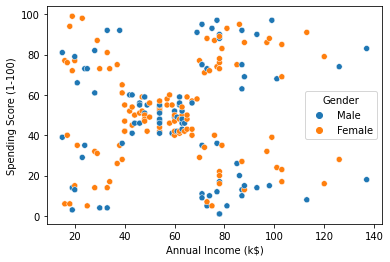

In [6]:
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


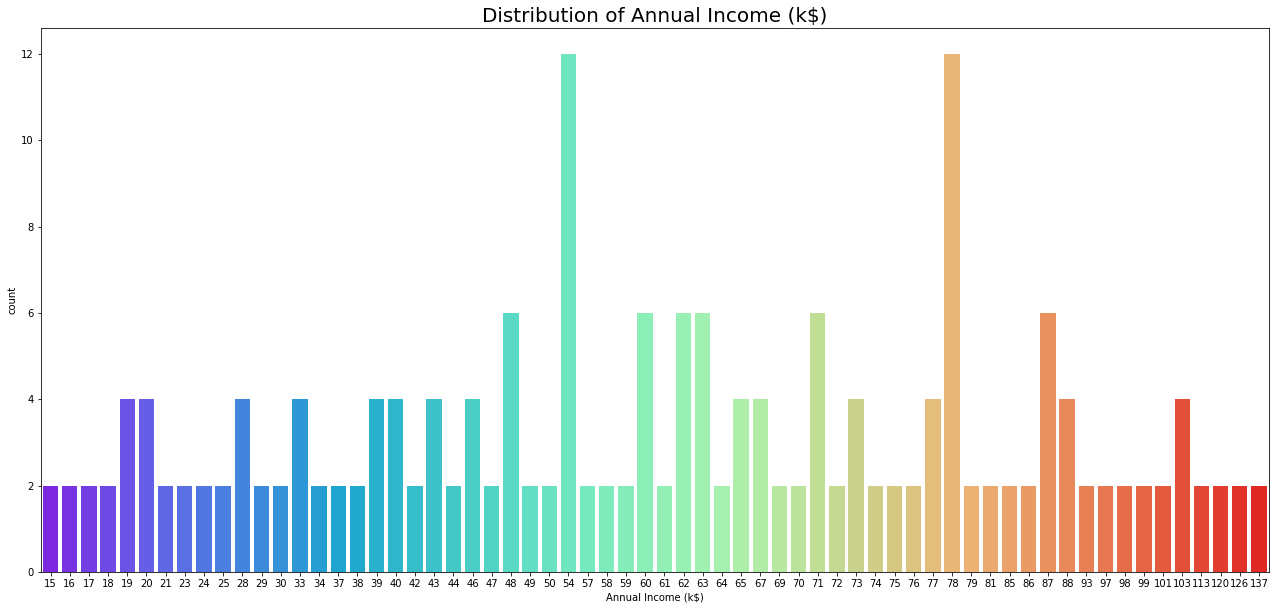

In [7]:
plt.figure(figsize=(22,10))
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '#Customers')

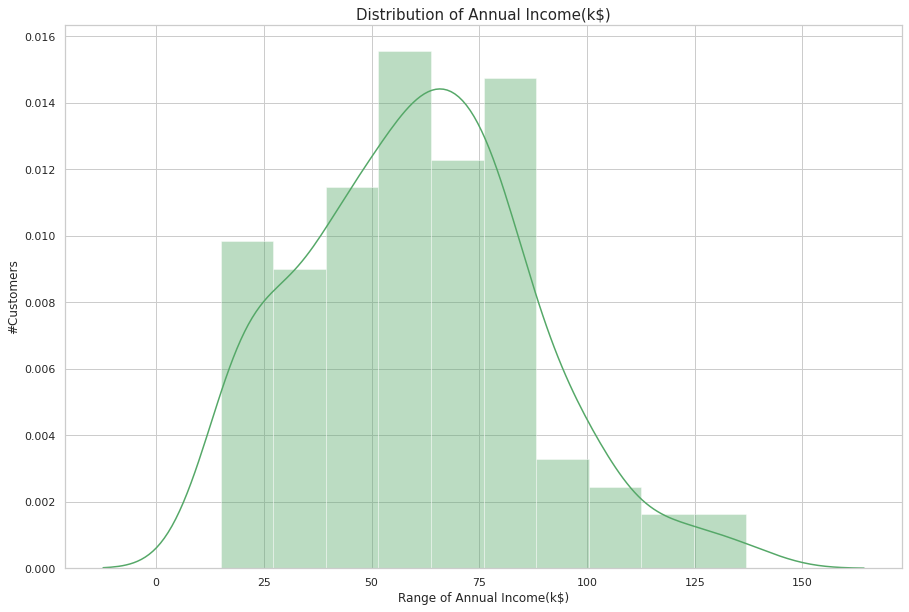

In [8]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'],color='g')
plt.title('Distribution of Annual Income(k$)', fontsize = 15)
plt.xlabel('Range of Annual Income(k$)')
plt.ylabel('#Customers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


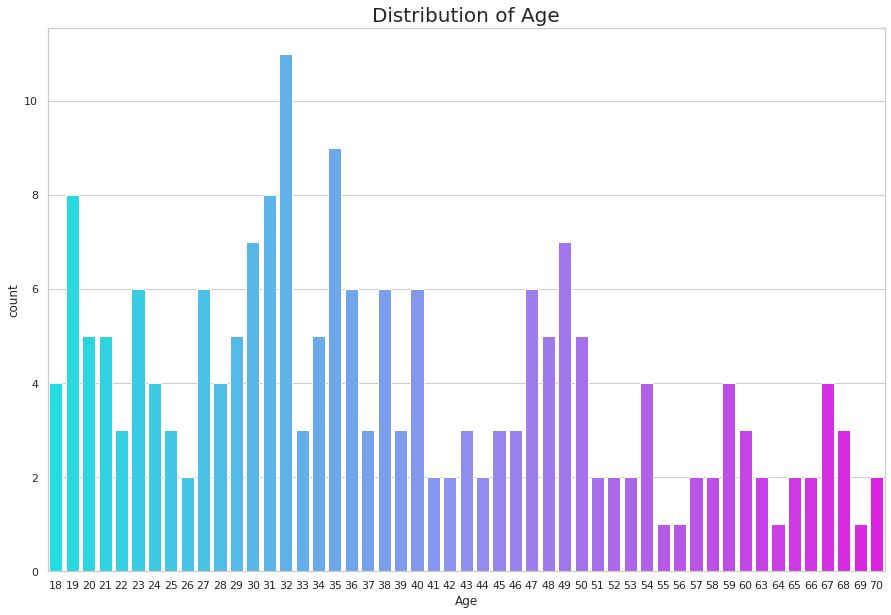

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'], palette = 'cool')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '#Customers')

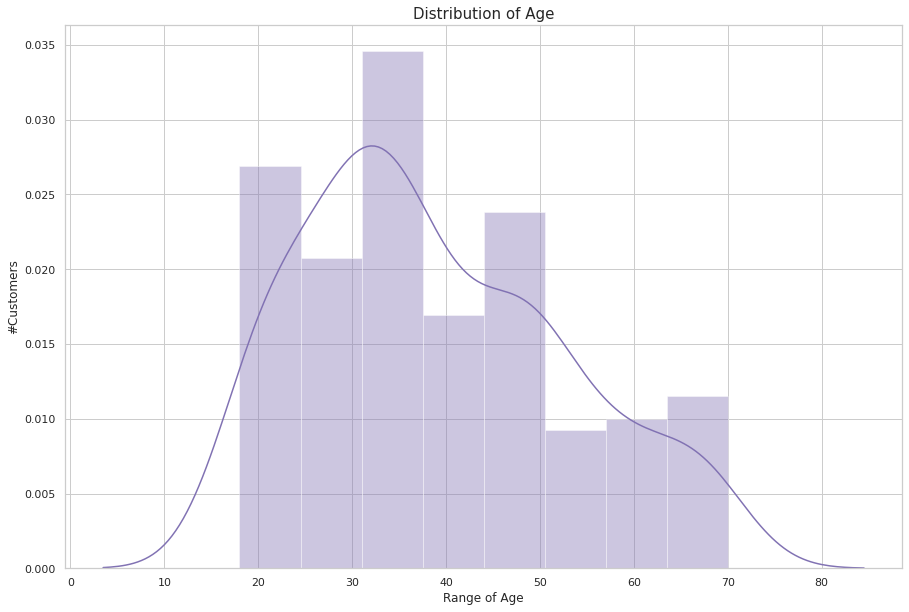

In [10]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'],color='m')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('#Customers')

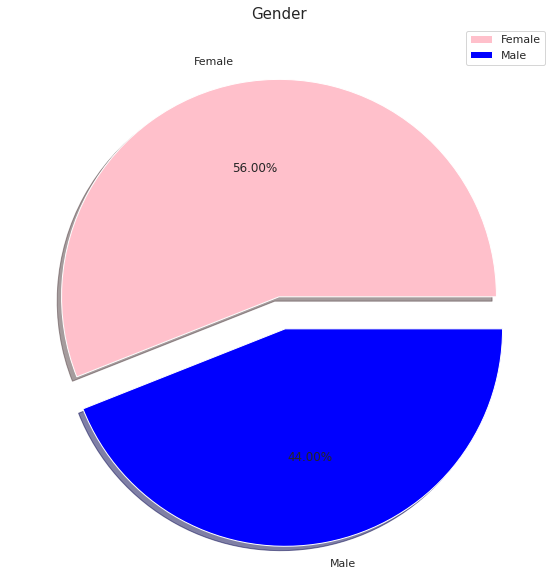

In [11]:
plt.figure(figsize=(10,10))
size = df['Gender'].value_counts()
colors = ['pink', 'blue']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

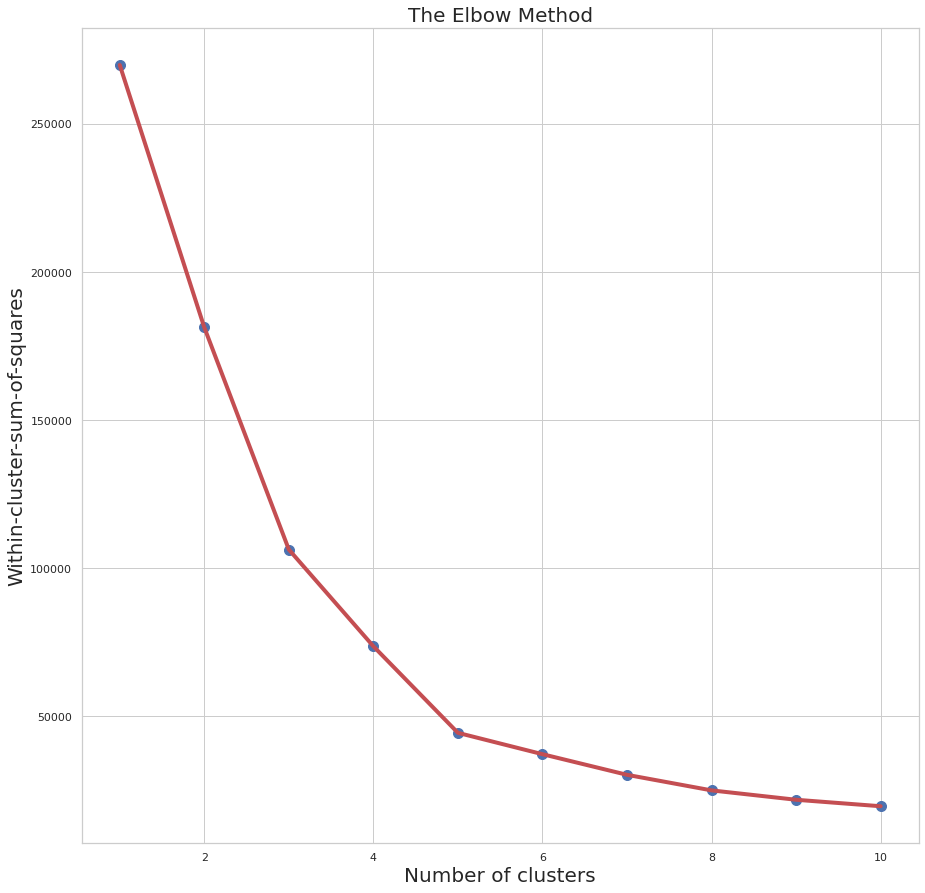

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,15))
plt.scatter(range(1, 11),wcss,c='b',s=100)
plt.plot(range(1, 11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

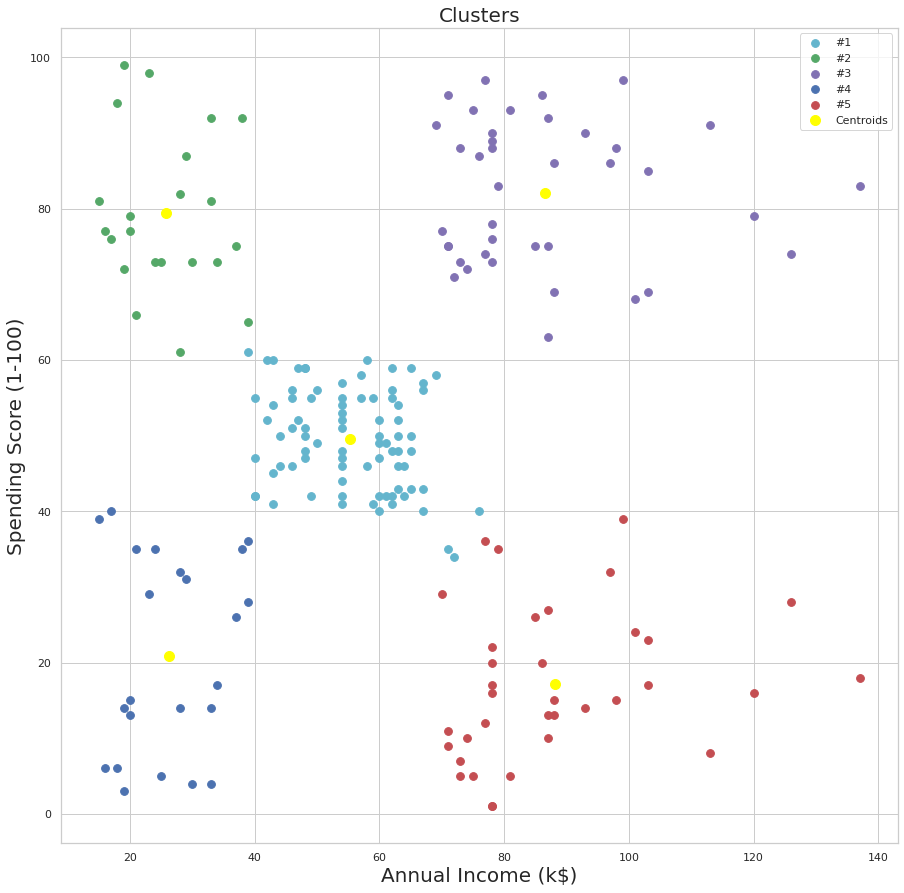

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'c', label = '#1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'g', label = '#2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'm', label = '#3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'b', label = '#4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'r', label = '#5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

In [15]:
temp = df.groupby('Gender')['Spending Score (1-100)'].agg(['mean', 'min', 'max'])
temp = pd.DataFrame(temp)
temp

,mean,min,max
Gender,,,
Female,51.526786,5,99
Male,48.511364,1,97


as we can see female spend more money than male

In [16]:
temp = df.groupby('Age')['Spending Score (1-100)'].agg(['mean', 'min', 'max', 'median'])
temp = pd.DataFrame(temp)
temp

,mean,min,max,median
Age,,,,
18,60.000000,41,92,53.5
19,39.750000,5,59,48.0
20,40.200000,5,75,49.0
21,66.800000,42,81,73.0
22,70.000000,55,79,76.0
23,63.333333,29,94,64.5
24,71.500000,52,92,71.0
25,39.666667,12,73,34.0
26,54.500000,54,55,54.5


people between the age of 20-40(estimated from data) spend more money

In [136]:
df.drop('CustomerID', axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
age_binner = KBinsDiscretizer(n_bins=5, encode='ordinal')
income_binner = KBinsDiscretizer(n_bins=5, encode='ordinal')
score_binner = KBinsDiscretizer(n_bins=5, encode='ordinal')

In [18]:
df['Age_Group'] = age_binner.fit_transform(df['Age'].values.reshape(-1,1)).astype('int64')
df['Income_binned'] = income_binner.fit_transform(df['Annual Income (k$)'].values.reshape(-1,1)).astype('int64')
df['Spending_Score_Binned'] = score_binner.fit_transform(df['Spending Score (1-100)'].values.reshape(-1,1)).astype('int64')

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [24]:
X, y = df.drop('Spending Score (1-100)', axis=1), df['Spending Score (1-100)']

In [25]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
robust = RobustScaler()
minmax = MinMaxScaler()

for col in X.columns:
  X[col] = robust.fit_transform(X[col].values.reshape(-1,1))
  X[col] = minmax.fit_transform(X[col].values.reshape(-1,1))

In [26]:
y = robust.fit_transform(y.values.reshape(-1,1))
y = minmax.fit_transform(y.reshape(-1,1))

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [28]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

In [41]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  acc = r2_score(y_val, pred)
  error = np.sqrt(mean_squared_error(y_val, pred))
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)
  print('Acc :', acc*100)
  print('\n')
  print('Error:', error)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

In [42]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingRegressor)
gradient

Acc : 91.87543199817361


Error: 0.07547922541562359


Train Score: 99.29766848287248


Val Score: 91.87543199817361


Is overfitting: True


Overfitting by: 7.422236484698871


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
forest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestRegressor)
forest

Acc : 93.73963362165848


Error: 0.06625629866799074


Train Score: 99.16091874049461


Val Score: 93.73963362165848


Is overfitting: True


Overfitting by: 5.421285118836124


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
neighbour = model_selection(x_train_, x_val, y_train_, y_val, KNeighborsRegressor)
neighbour

Acc : 89.7472299761461


Error: 0.08479063811257032


Train Score: 91.75241241837512


Val Score: 89.7472299761461


Is overfitting: True


Overfitting by: 2.005182442229014


In [50]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
pred = model.predict(x_test)
pred

array([0.42489796, 0.32142857, 0.42887755, 0.84785714, 0.14765306,
       0.70704082, 0.32918367, 0.60693878, 0.15979592, 0.69673469,
       0.47642857, 0.6077551 , 0.57959184, 0.07540816, 0.57744898,
       0.34204082, 0.34183673, 0.07479592, 0.57561224, 0.55602041,
       0.47387755, 0.81795918, 0.34091837, 0.47663265, 0.83673469,
       0.47081633, 0.57010204, 0.5227551 , 0.32387755, 0.72      ,
       0.41163265, 0.08459184, 0.88846939, 0.41877551, 0.84938776,
       0.32622449, 0.89908163, 0.50193878, 0.47663265, 0.70581633])

In [52]:
accuracy = r2_score(y_test, pred)
accuracy*100

96.54971288937253

In [55]:
pred_ = model.predict(X.iloc[98:99])
print('Original values:', y[98], 'Predicted value:', pred_)

Original values: [0.41836735] Predicted value: [0.41877551]
